# Data Augmentation with PyTorch

This notebook will show how the images in a dataset can be processed using both geometric and colour operations.


### Refs

PyTorch Transforms: https://pytorch.org/vision/stable/transforms.html

Pytorch Illustration of Transforms: https://pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_illustrations.html



In [125]:
import torch
import torchvision
from torchvision.transforms import v2

import matplotlib.pyplot as plt
import numpy as np
import time

# importing a module with utilities for displaying stats and data
import sys
sys.path.insert(1, './util')
import vcpi_util

In [126]:
data_dir = "dogsVScats/dogsVScats"
img_size = 128

BATCH_SIZE = 8

In [127]:
from PIL import Image

In [128]:
img1 = Image.open(f'{data_dir}/cats/cat.3.jpg')
img2 = Image.open(f'{data_dir}/cats/cat.4.jpg')

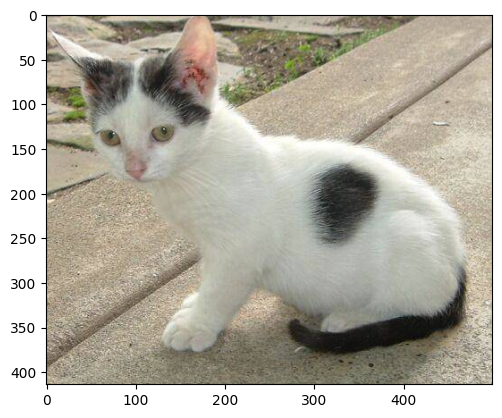

In [129]:
plt.imshow(img1)

In [130]:
transform = v2.Compose([
    v2.ToImage(),
    v2.Resize((img_size,img_size)), 
    v2.ToDtype(torch.float32, scale=True)])

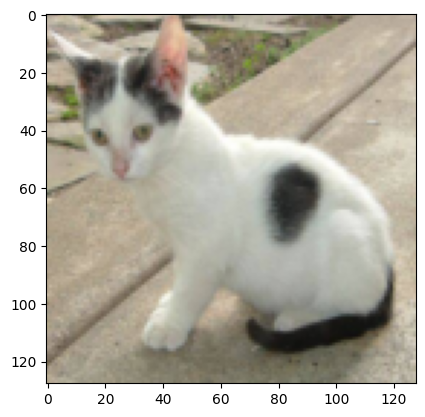

In [131]:
transf_img = transform(img1)

plt.imshow(np.transpose(transf_img.numpy(),(1,2,0)))

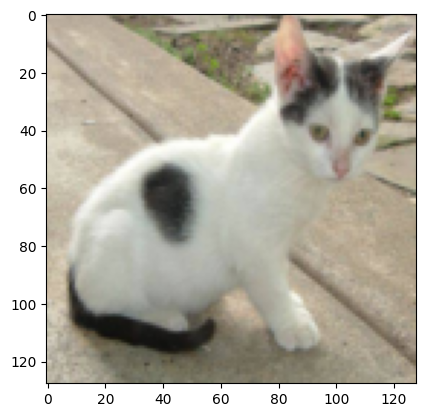

In [132]:
transform = v2.Compose([
    v2.ToImage(),
    v2.Resize((img_size,img_size)),
    v2.RandomHorizontalFlip(0.5), 
    v2.ToDtype(torch.float32, scale=True)])
transf_img = transform(img1)

plt.imshow(np.transpose(transf_img.numpy(),(1,2,0)))

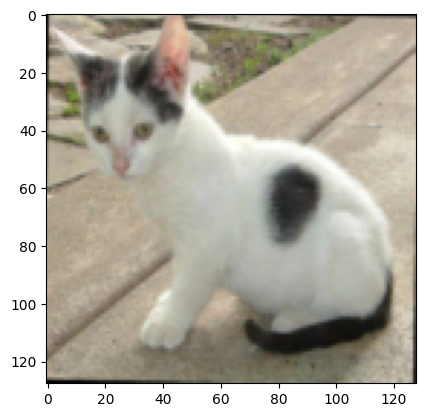

In [133]:
transform = v2.Compose([
    v2.ToImage(),
    v2.RandomRotation(10, v2.InterpolationMode.BILINEAR),
    v2.Resize((img_size,img_size)), 
    v2.ToDtype(torch.float32, scale=True)])
transf_img = transform(img1)

plt.imshow(np.transpose(transf_img.numpy(),(1,2,0)))

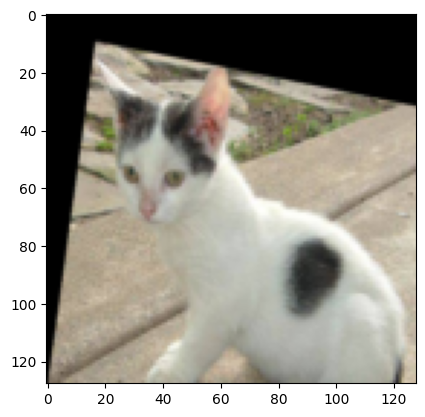

In [134]:
transform = v2.Compose([
    v2.ToImage(),
    v2.RandomAffine(degrees=10, translate=(0.2,0.2)),
    v2.Resize((img_size,img_size)), 
    v2.ToDtype(torch.float32, scale=True)])
transf_img = transform(img1)

plt.imshow(np.transpose(transf_img.numpy(),(1,2,0)))

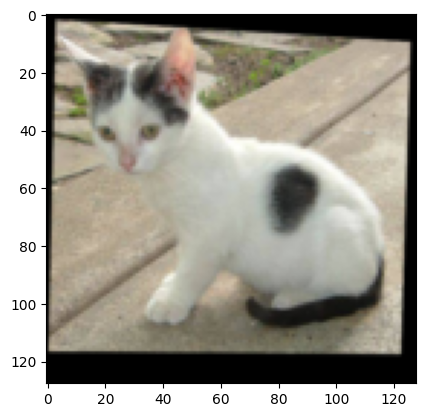

In [135]:
transform = v2.Compose([
    v2.ToImage(),
    v2.RandomPerspective(distortion_scale=0.2, p=1.0),
    v2.Resize((img_size,img_size)), 
    v2.ToDtype(torch.float32, scale=True)])
transf_img = transform(img1)

plt.imshow(np.transpose(transf_img.numpy(),(1,2,0)))

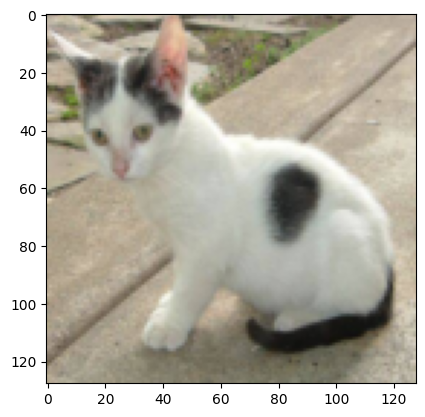

In [136]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.Resize((img_size, img_size)),
        v2.RandomCrop(size=(img_size, img_size)),
        v2.ToDtype(torch.float32, scale=True),
    ]
)
transf_img = transform(img1)

plt.imshow(np.transpose(transf_img.numpy(), (1, 2, 0)))

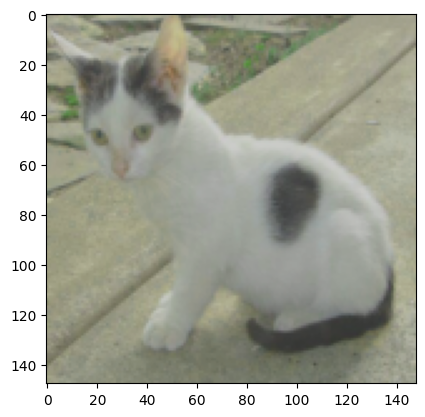

In [137]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.Resize((img_size + 20, img_size + 20)),
        v2.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.2, hue=0.2),
        v2.ToDtype(torch.float32, scale=True),
    ]
)


transf_img = transform(img1)



plt.imshow(np.transpose(transf_img.numpy(), (1, 2, 0)))

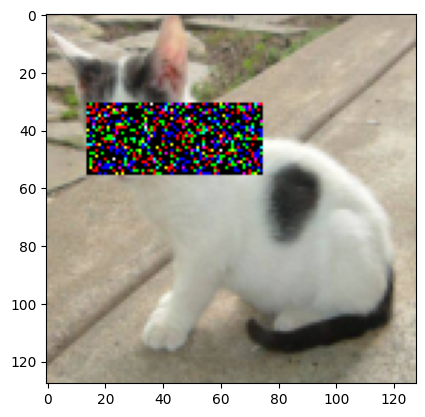

In [138]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.Resize((img_size, img_size)),
        v2.RandomErasing(1, scale=(0.05, 0.1), value="random"),
        v2.ToDtype(torch.float32, scale=True),
    ]
)


transf_img = transform(img1)



plt.imshow(np.transpose(transf_img.numpy(), (1, 2, 0)))

In [139]:
train_set = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE,shuffle=True)

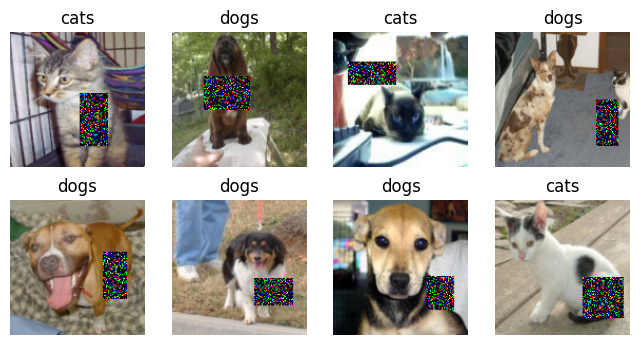

<Figure size 640x480 with 0 Axes>

In [140]:
imgs, labels=next(iter(train_loader))
vcpi_util.show_images(2,4,imgs,labels, train_set.classes)

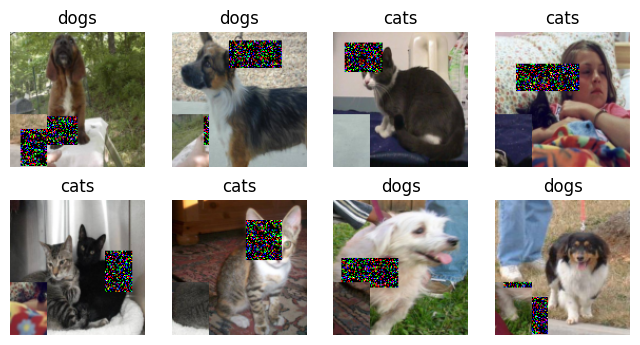

<Figure size 640x480 with 0 Axes>

In [141]:
transform2 = v2.Compose(
    [
        v2.Resize((img_size, img_size)),
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
    ]
)

train_set = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE,shuffle=True)

cutmix = v2.CutMix(num_classes=2)
mixup = v2.MixUp(num_classes=2)

cutmix_or_mixup = v2.RandomChoice([cutmix, mixup],[0.5,0.5])

imgs, labels = next(iter(train_loader))
imgs2, labels2 = cutmix_or_mixup(imgs, labels)

vcpi_util.show_images(2,4,imgs2,labels, train_set.classes)

In [142]:
print(labels2)

tensor([[0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.8932, 0.1068],
        [1.0000, 0.0000],
        [1.0000, 0.0000],
        [1.0000, 0.0000],
        [0.1068, 0.8932],
        [0.0000, 1.0000]])


In [143]:
train_loader = torch.utils.data.DataLoader(
    torch.utils.data.ConcatDataset(
        [
            torchvision.datasets.ImageFolder(root=data_dir, transform=transform),
            torchvision.datasets.ImageFolder(root=data_dir, transform=transform2),
        ]
    ), batch_size = 16, shuffle = True
)

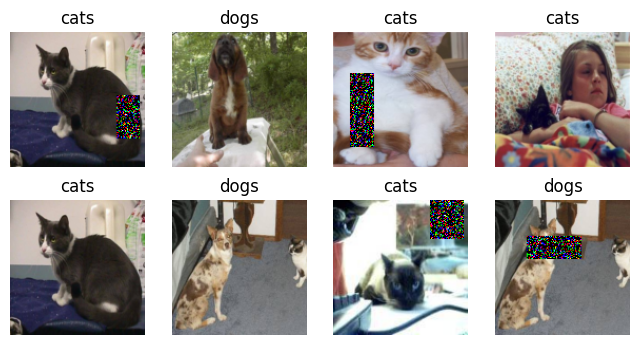

<Figure size 640x480 with 0 Axes>

In [148]:
imgs, labels = next(iter(train_loader))
vcpi_util.show_images(2,4,imgs,labels,train_set.classes)